In [46]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pylab import rcParams

from uncertainties import ufloat
from uncertainties.umath import *


main_dir = "/Volumes/FLASH/School/S2017/PHYS274L/Lab5/"

In [47]:
## -- Functions

def linear(x,m,c):
    return (x*m)+c

    ## -- Chi-2

def chisqg(ydata,ymod,sd=None):  
  """  
Returns the chi-square error statistic as the sum of squared errors between  
Ydata(i) and Ymodel(i). If individual standard deviations (array sd) are supplied,   
then the chi-square error statistic is computed as the sum of squared errors  
divided by the standard deviations.     Inspired on the IDL procedure linfit.pro.  
See http://en.wikipedia.org/wiki/Goodness_of_fit for reference.  

x,y,sd assumed to be Numpy arrays. a,b scalars.  
Returns the float chisq with the chi-square statistic.  

Rodrigo Nemmen  
http://goo.gl/8S1Oo  
  """  
  # Chi-square statistic (Bevington, eq. 6.9)  
  if sd==None:  
       chisq=np.sum((ydata-ymod)**2)  
  else:  
       chisq=np.sum( ((ydata-ymod)/sd)**2 )  

  return chisq  


In [48]:
## -- Constants
m_e = 9.10938356e-31 ## kg
e = 1.60217662e-19 ## C
h = 6.62607004e-34 ##m^2 kg s^-1
L = ufloat(0.130, 0.002) #m

d_2_theo = 123.0e-12 #m
d_1_theo = 213.0e-12 #m

In [49]:
## -- Reading Data
data = np.genfromtxt(main_dir+"data.txt", delimiter=',')
volt = data[:,0] #KV
d_volt = data[:,1]
D_1 = data[:,2] #mm
d_D_1 = data[:,3]
D_2 = data[:,4]
d_D_2 = data[:,5]

Plot 1:
Chi-2: 2.49251507129e-06
Slope: 1.40652279469 +/- 0.103967570127
Intercept: 0.0054208373304 +/- 0.00177600346547


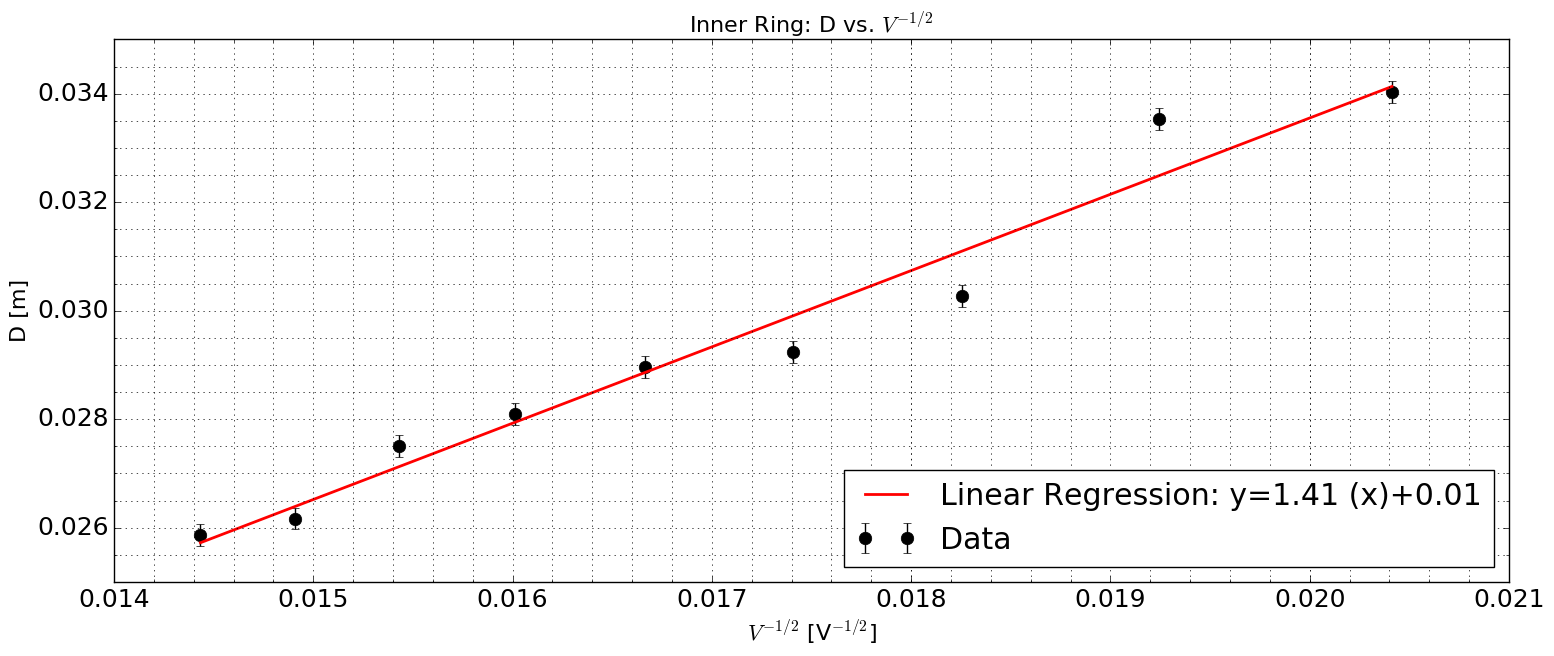

In [65]:
## -- Inner Ring
X = 1.0 / np.sqrt(volt*1000.0)
Y = D_1 / 1000.0

popt, pcov = curve_fit(linear, X, Y, 
                       sigma=d_D_1/100.0)

plt.clf()
rcParams['figure.figsize'] = 18, 7
rcParams.update({'font.size': 18})
plt.minorticks_on()


plt.errorbar(X, Y, yerr=d_D_1/100.0, fmt='.', label="Data", 
             color="k", ms=18)

plt.plot(X, linear(X, *popt), "r-", linewidth=2.0, 
         label="Linear Regression: y="+str(round(popt[0], 2))+" (x)+"+str(round(popt[1], 2)))

plt.title("Inner Ring: D vs. $V^{-1/2}$", fontsize=16)
plt.ylabel("D [m]", fontsize=16)
plt.xlabel("$V^{-1/2}$ [V$^{-1/2}$]", fontsize=16)
plt.legend(loc=4)
plt.grid(b=True, which='minor', linestyle=':')
plt.grid(b=True, which='major', linestyle=':')

chi2 = chisqg(Y, linear(X, *popt))

print("Plot 1:")
print("Chi-2: %s")%(chi2)
print("Slope: %s +/- %s") %(popt[0], np.sqrt(pcov[0,0]))
print("Intercept: %s +/- %s") %(popt[1], np.sqrt(pcov[1,1]))

plt.savefig(main_dir+"plot_1.png", bbox_inches='tight')

In [66]:
## -- Inner Ring Calculations
slope = ufloat((popt[0], np.sqrt(pcov[0,0])))
intercept = ufloat(popt[1], np.sqrt(pcov[1,1]))

d = (h*2.0*L) / (np.sqrt(2.0*m_e*e)*slope)

print("Experimental Value of $d_1$: %s")%(d/1.0e-12)
print("Theoretical Value of $d_1$: %s")%(d_1_theo/1.0e-12)
print("Z-score: %s")%((d.n - d_1_theo)/d.s)

Experimental Value of $d_1$: 227+/-17
Theoretical Value of $d_1$: 213.0
Z-score: 0.800874071423


/Users/kaimibk/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Obsolete: either use ufloat(nominal_value, std_dev), ufloat(nominal_value, std_dev, tag), or the ufloat_fromstr() function, for string representations. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  from ipykernel import kernelapp as app


Plot 2:
Chi-2: 2.6219609554e-06
Slope: 2.55805550587 +/- 0.106633114258
Intercept: 0.00691934245821 +/- 0.00182153697824


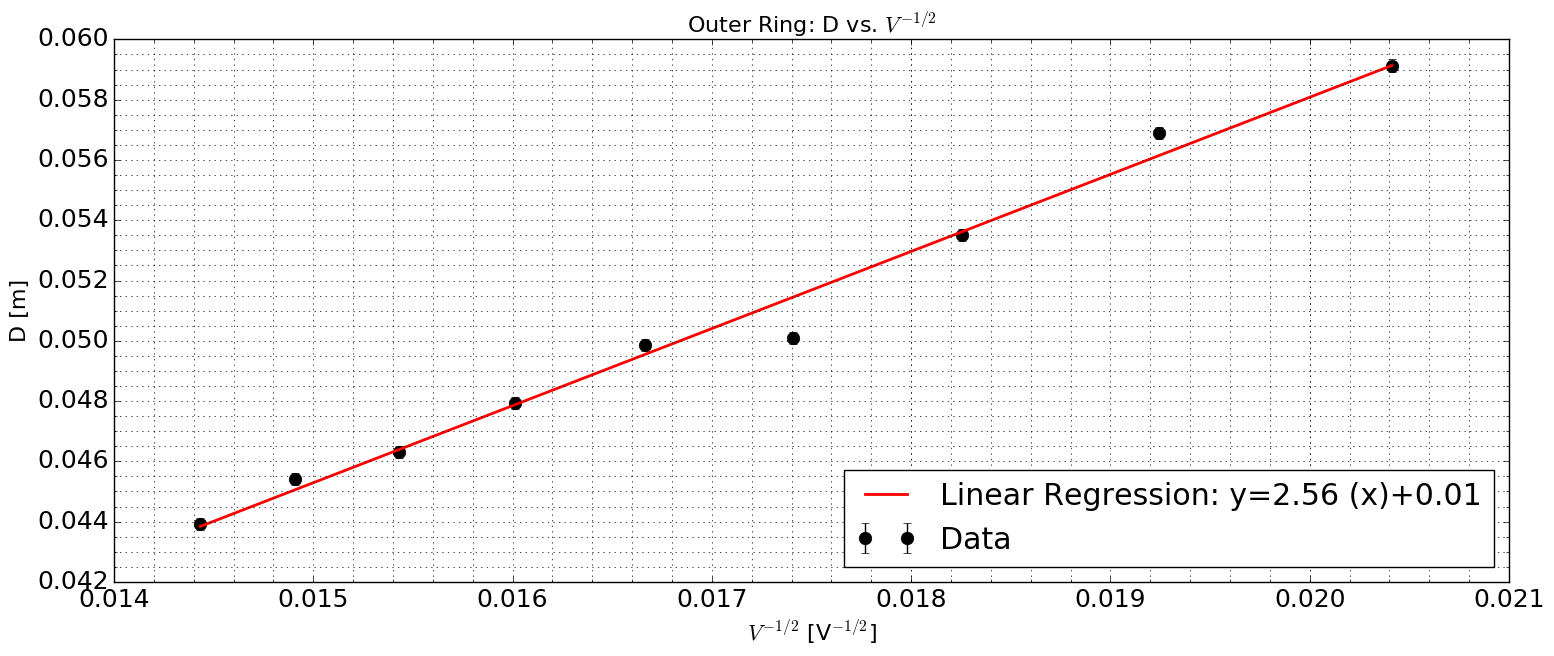

In [71]:
## -- Outer Ring Plotting
Y = D_2 / 1000.0

popt, pcov = curve_fit(linear, X,Y, 
                       sigma=d_D_2/100.0)

plt.clf()
rcParams['figure.figsize'] = 18, 7
rcParams.update({'font.size': 18})
plt.minorticks_on()


plt.errorbar(X,Y, yerr=d_D_2/100.0, fmt='.', label="Data", 
             color="k", ms=18)

plt.plot(X, linear(X, *popt), "r-", linewidth=2.0, 
         label="Linear Regression: y="+str(round(popt[0], 2))+" (x)+"+str(round(popt[1], 2)))

plt.title("Outer Ring: D vs. $V^{-1/2}$", fontsize=16)
plt.ylabel("D [m]", fontsize=16)
plt.xlabel("$V^{-1/2}$ [V$^{-1/2}$]", fontsize=16)
plt.legend(loc=4)
plt.grid(b=True, which='minor', linestyle=':')
plt.grid(b=True, which='major', linestyle=':')

chi2 = chisqg(Y,linear(X, *popt))

print("Plot 2:")
print("Chi-2: %s")%(chi2)
print("Slope: %s +/- %s") %(popt[0], np.sqrt(pcov[0,0]))
print("Intercept: %s +/- %s") %(popt[1], np.sqrt(pcov[1,1]))

plt.savefig(main_dir+"plot_2.png", bbox_inches='tight')

In [68]:
## -- Outer Ring Calculations
slope = ufloat((popt[0], np.sqrt(pcov[0,0])))
intercept = ufloat(popt[1], np.sqrt(pcov[1,1]))

d = (h*2.0*L) / (np.sqrt(2.0*m_e*e)*slope)

print("Experimental Value of $d_2$: %s")%(d/1.0e-12)
print("Theoretical Value of $d_2$: %s")%(d_2_theo/1.0e-12)
print("Z-score: %s")%((d.n - d_2_theo)/d.s)

Experimental Value of $d_2$: 125+/-6
Theoretical Value of $d_2$: 123.0
Z-score: 0.298542591265


/Users/kaimibk/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Obsolete: either use ufloat(nominal_value, std_dev), ufloat(nominal_value, std_dev, tag), or the ufloat_fromstr() function, for string representations. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  from ipykernel import kernelapp as app


In [57]:
## --- Misc

linear(X, *popt)

array([ 0.03413136,  0.03248938,  0.03110031,  0.02990526,  0.02886288,
        0.02794323,  0.02712396,  0.02638804,  0.02572225])

In [58]:
#if __name__ == '__main__':
Y

array([ 0.03403333,  0.03353333,  0.03026667,  0.02923333,  0.02896667,
        0.0281    ,  0.0275    ,  0.02616667,  0.02586667])